# Exploratory Data Analysis: What Makes a Data Analyst Role Worth It?

## Project Goal
### I wanted to take a closer look at what makes certain data roles more valuable than others—especially for people trying to break into or grow in the data field. Using Python, I analyzed a real-world dataset with job listings to uncover:

1.Which data roles are most common (and in-demand)
2.What skills are most sought after
3.And which of those skills actually pay well

## What I Built
1.A Jupyter Notebook that walks through the full analysis step by step.
2.A clean and simple README that summarizes the most interesting insights.
3.The whole project is shared on GitHub, and I’ll also post highlights on LinkedIn.

## Questions I Wanted to Answer
1.What are the most in-demand skills for the top 3 data roles?
2.For Data Analysts, how are the most requested skills trending over time?
3.How much do jobs for Data Analysts pay—and how does that change based on the skills required?
4.Which skill is the "best bet" for Data Analysts (i.e. high demand and high salary)?

## Exploratory Data Analysis for all Data Roles
### Roles to Explore

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


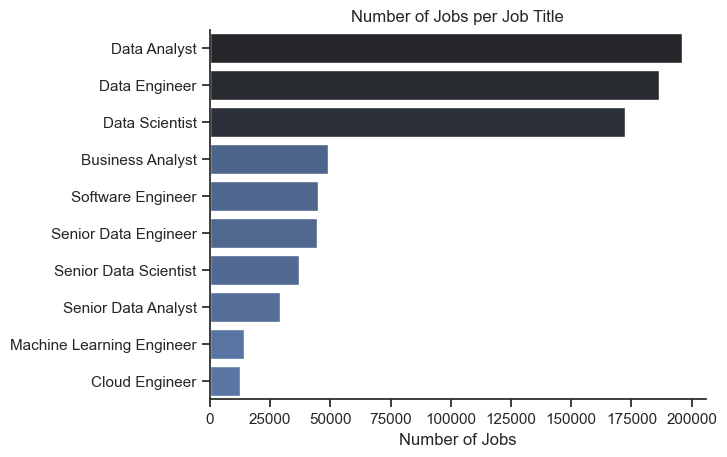

In [7]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Countries to Explore

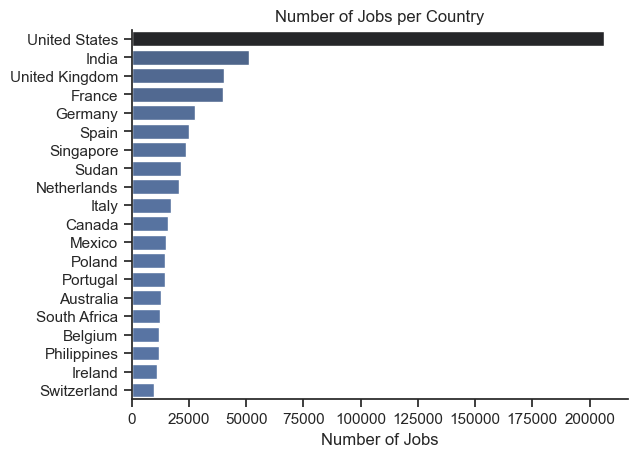

In [8]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Companies to Explore

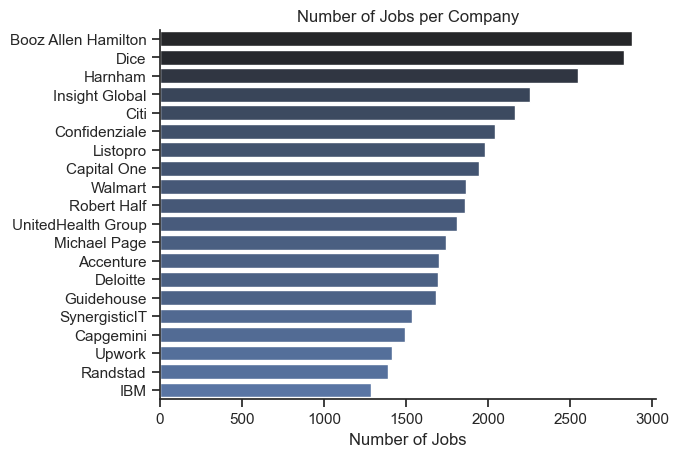

In [13]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

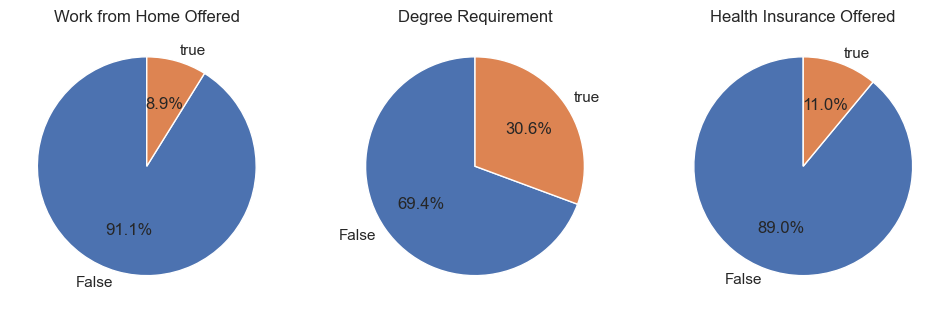

In [17]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 6)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'true'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
